In [16]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
ames = pd.read_csv("https://www.dropbox.com/scl/fi/g0n5le5p6fr136ggetfsf/AmesHousing.csv?rlkey=jlr9xtz1o6u5rghfo29a5c02f&dl=1")
good_cols = ames.isna().sum() < 100           # drop mostly-missing columns
ames = ames.loc[:, good_cols].dropna()

X = ames.drop(["SalePrice", "Order", "PID"], axis=1, errors="ignore")
y = ames["SalePrice"]

In [3]:
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
         make_column_selector(dtype_include=object)),
        ("num", StandardScaler(),
         make_column_selector(dtype_include=np.number)),
    ],
    remainder="passthrough"
)

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [4]:
ols_pipe = Pipeline([
    ("pre", ct),
    ("model", LinearRegression())
])

ridge1_pipe = Pipeline([
    ("pre", ct),
    ("model", Ridge(alpha=1.0, random_state=0))
])

In [7]:
ols_rmse_scores = cross_val_score(ols_pipe, X, y, cv=5, scoring="neg_root_mean_squared_error")
ols_rmse_mean = -ols_rmse_scores.mean()
ols_rmse_sd = -ols_rmse_scores.std()
print("ols rmse mean: ", ols_rmse_mean)
print("ols rmse sd: ", ols_rmse_sd)

ols rmse mean:  29730.707207754294
ols rmse sd:  -6602.756088222136


In [9]:
ols_r2_scores = cross_val_score(ols_pipe, X, y, cv=5, scoring="r2")
ols_r2_mean = ols_r2_scores.mean()
ols_r2_sd = ols_r2_scores.std()
print("ols r2 mean: ", ols_r2_mean)
print("ols r2 sd: ", ols_r2_sd)

ols r2 mean:  0.8538898800207827
ols r2 sd:  0.06027782764862018


In [10]:
ridge_rmse_scores = cross_val_score(ridge1_pipe, X, y, cv=5, scoring="neg_root_mean_squared_error")
ridge_rmse_mean = -ridge_rmse_scores.mean()
ridge_rmse_sd = -ridge_rmse_scores.std()
print("ridge rmse mean: ", ridge_rmse_mean)
print("ridge rmse sd: ", ridge_rmse_sd)

ridge rmse mean:  28871.91955382137
ridge rmse sd:  -6709.583773535257


In [11]:
ridge_r2_scores = cross_val_score(ridge1_pipe, X, y, cv=5, scoring="r2")
ridge_r2_mean = ridge_r2_scores.mean()
ridge_r2_sd = ridge_r2_scores.std()
print("ridge r2 mean: ", ridge_r2_mean)
print("ridge r2 sd: ", ridge_r2_sd)

ridge r2 mean:  0.8619316345217338
ridge r2 sd:  0.05910380857189079


In [12]:
ols_pipe.fit(X, y)
ridge1_pipe.fit(X, y)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2252348770>),
                                                 ('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2260958800>)])),
                ('model', Ridge(random_state=0))])

In [13]:
cat_names = ols_pipe.named_steps["pre"].transformers_[0][1].get_feature_names_out(
    input_features=X.select_dtypes(include="object").columns
)
cat_names

array(['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Grvl',
       'Street_Pave', 'Lot Shape_IR1', 'Lot Shape_IR2', 'Lot Shape_IR3',
       'Lot Shape_Reg', 'Land Contour_Bnk', 'Land Contour_HLS',
       'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot Config_Corner',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside', 'Land Slope_Gtl', 'Land Slope_Mod',
       'Land Slope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Nei

In [14]:
num_names = X.select_dtypes(include=np.number).columns.astype(str)
num_names

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [15]:
feat_names = np.r_[cat_names, num_names]

In [22]:
coef_df = pd.DataFrame({
    "feature": feat_names,
    "OLS":      ols_pipe.named_steps["model"].coef_[:len(feat_names)],
    "Ridge_λ1": ridge1_pipe.named_steps["model"].coef_[:len(feat_names)]
}).set_index("feature")

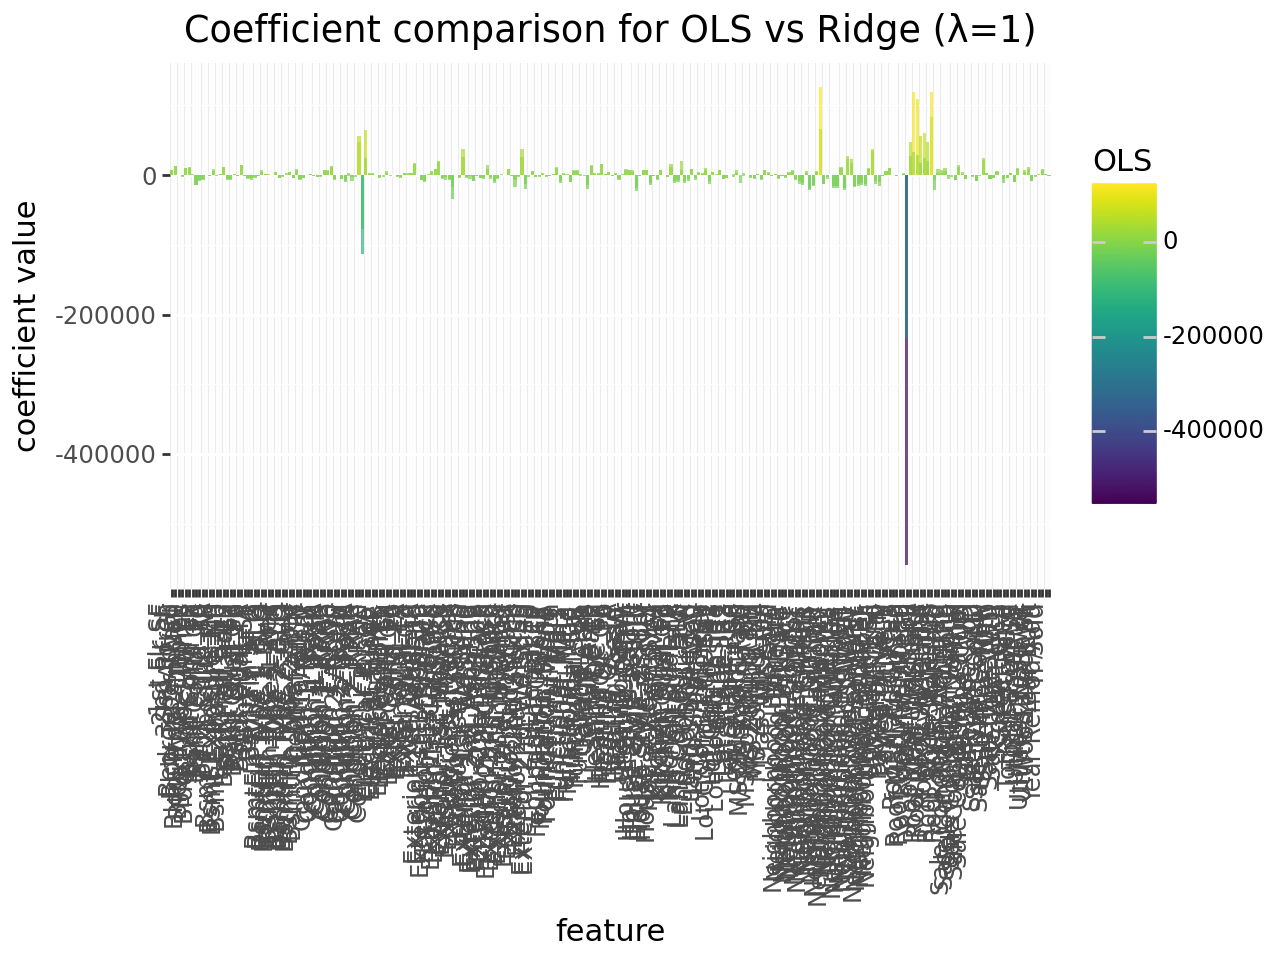

In [25]:
(
    ggplot(coef_df.sort_index().reset_index(), aes(x="feature"))
    + geom_bar(aes(y="OLS", fill="OLS"), stat="identity", position="dodge", alpha=0.7)
    + geom_bar(aes(y="Ridge_λ1", fill="Ridge_λ1"), stat="identity", position="dodge", alpha=0.7)
    + labs(title = "Coefficient comparison for OLS vs Ridge (λ=1)",
           y = "coefficient value")
    + theme(axis_text_x=element_text(rotation=90, hjust=1))
)

Using the same pipeline as previously, perform tuning on lambda.

You should always try lambda values on a log scale; that is, don\'t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [26]:
ridge_pipe = Pipeline([
    ("pre", ct),
    ("model", Ridge(random_state=0))
])

In [27]:
param_grid = {"model__alpha": np.logspace(-3, 3, 13)}
param_grid

{'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
        1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
        1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
        1.00000000e+03])}

In [28]:
gscv_ridge = GridSearchCV(
    ridge_pipe, param_grid,
    scoring="neg_root_mean_squared_error", cv=5, n_jobs=None
)
gscv_ridge.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2252348770>),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2260958800>)])),
                                       ('model', Ridge(random_state=0))]),
             param_grid={'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             scoring='neg_root_mean_squared_error')

In [29]:
gscv_ridge.best_params_["model__alpha"]

np.float64(10.0)

In [31]:
-gscv_ridge.best_score_

np.float64(28633.512974899088)

Create a LASSO pipeline, and tune lambda.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [32]:
lasso_pipe = Pipeline([
    ("pre", ct),
    ("model", Lasso(max_iter=10000, random_state=0))
])

In [33]:
param_grid = {"model__alpha": np.logspace(-3, 1, 9)}

In [34]:
gscv_lasso = GridSearchCV(
    lasso_pipe, param_grid,
    scoring="neg_root_mean_squared_error", cv=5
)
gscv_lasso.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2252348770>),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2260958800>)])),
                                       ('model',
                                        Lasso(max_iter=10000,
                                              random_state=0))]),
             param_grid={'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [35]:
gscv_lasso.best_params_["model__alpha"]

np.float64(10.0)

In [36]:
-gscv_lasso.best_score_

np.float64(29019.05191941983)

In [37]:
best_lasso = gscv_lasso.best_estimator_
best_lasso.fit(X, y)
lasso_coef = best_lasso.named_steps["model"].coef_[:len(feat_names)]
lasso_coef

array([-4.51898958e+03,  0.00000000e+00, -0.00000000e+00,  4.59256134e+03,
        2.31827307e+03, -2.08235173e+03, -1.70965918e+04,  6.93257761e-10,
       -1.16351324e+03,  4.37136675e+03, -0.00000000e+00,  0.00000000e+00,
       -9.49462247e+03,  5.42684544e+03, -9.44561591e+03,  1.35861380e+02,
        3.64335710e+03, -0.00000000e+00, -0.00000000e+00,  7.90332217e+01,
        6.36350586e+03, -5.95620348e+03, -2.90507491e+03,  0.00000000e+00,
       -0.00000000e+00,  6.16612008e+03, -1.10426840e+04,  4.81758840e+03,
        8.94742519e+03,  1.31928184e+04,  3.75089101e+03, -0.00000000e+00,
       -2.66427635e+03,  1.46845352e+04, -1.01570542e+04, -3.79902131e+03,
        1.02574836e+04,  1.09304458e+05, -2.35734919e+03,  0.00000000e+00,
        7.12699605e+03, -6.36780861e+03, -6.32679579e+03,  1.49640904e+04,
       -9.25353657e+03,  3.49564239e+04,  2.80292835e+04, -6.33356337e+03,
       -3.72792988e+03, -1.84028112e+03, -3.36693040e+03,  1.87963345e+04,
        4.46064027e+04, -

In [38]:
coef_df["LASSO_best"] = lasso_coef

Text(0, 0.5, 'coefficient value')

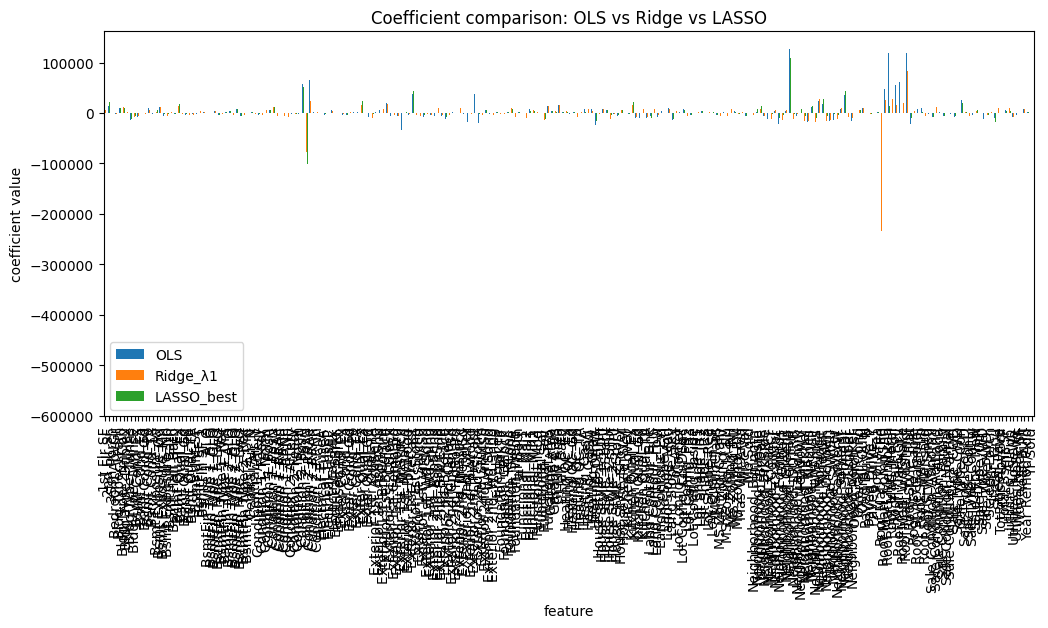

In [45]:
ax = coef_df[["OLS","Ridge_λ1","LASSO_best"]].sort_index().plot(kind="bar", figsize=(12,5))
ax.set_title("Coefficient comparison: OLS vs Ridge vs LASSO")
ax.set_ylabel("coefficient value")

Create an Elastic Net pipeline, and tune lambda and alpha.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [46]:
e_net_pipe = Pipeline([
    ("pre", ct),
    ("model", ElasticNet(max_iter=10000, random_state=0))
])

In [48]:
param_grid = {
    "model__alpha":    np.logspace(-3, 1, 9),
    "model__l1_ratio": np.linspace(0.05, 0.95, 7)
}
param_grid

{'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
        1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
        1.00000000e+01]),
 'model__l1_ratio': array([0.05, 0.2 , 0.35, 0.5 , 0.65, 0.8 , 0.95])}

In [50]:
gscv_enet = GridSearchCV(
    e_net_pipe, param_grid,
    scoring="neg_root_mean_squared_error", cv=5
)
gscv_enet.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+09, tolerance: 1.348e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+09, tolerance: 1.474e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.619e+09, tolerance: 1.463e+09
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2252348770>),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2260958800>)])),
                                       ('model',
                                        ElasticNet(max_iter=10000,
                                                   random_state=0))]),
             param_grid={'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01]),
                         'model__l1_ratio': array([0.05, 0.2 , 0.35, 0.5 , 0.65, 0.8 , 0.95])},
             scoring='neg_root_mean_squared_error')

In [54]:
gscv_enet.best_params_

{'model__alpha': np.float64(0.1), 'model__l1_ratio': np.float64(0.95)}

In [55]:
-gscv_enet.best_score_

np.float64(28631.874193477874)

In [56]:
best_e_net = gscv_enet.best_estimator_
best_e_net.fit(X, y)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2241e68ce0>),
                                                 ('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2241e683e0>)])),
                ('model',
                 ElasticNet(alpha=np.float64(0.1), l1_ratio=np.float64(0.95),
                            max_iter=10000, random_state=0))])

In [57]:
enet_coef = best_e_net.named_steps["model"].coef_[:len(feat_names)]

Text(0, 0.5, 'coefficient value')

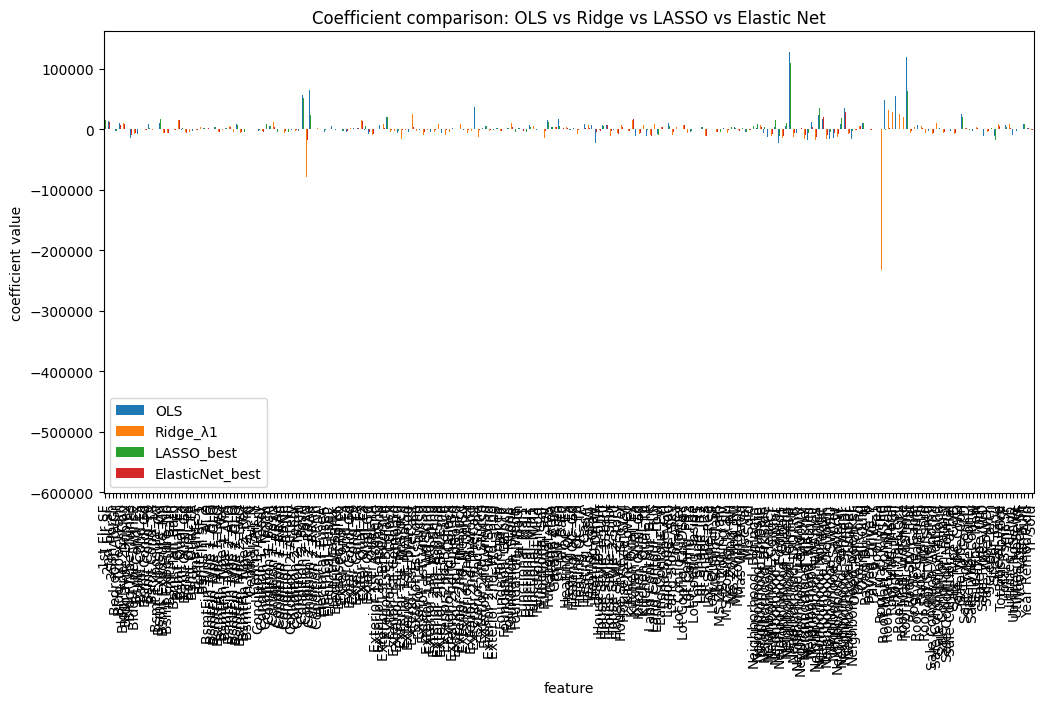

In [59]:
coef_df["ElasticNet_best"] = enet_coef
ax = coef_df[["OLS","Ridge_λ1","LASSO_best","ElasticNet_best"]].sort_index().plot(kind="bar", figsize=(12,6))
ax.set_title("Coefficient comparison: OLS vs Ridge vs LASSO vs Elastic Net")
ax.set_ylabel("coefficient value")